<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/NN_Regresija_Regularizacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod

Kao i u prethodnoj svesci i u ovoj je primer rešavanja regresionog problema. Koristi se baza podataka „Boston Housing“. Ovde su kreirane četiri neuronske mreže. Prva mreža je ista kao u prethodnoj svesci. Prilikom treniranja druge mreže primenjena je regularizacija upotrebom L2 regularizatora kako bi se sprečila preprilagođenost modela podacima. U trećoj mreži su dodata dva nova „Dropout“ sloja, koja takođe sprečavaju preprilagodjenost. U četvrtoj mreži je upotrebljen i Dropout i L2 regularizator. Prilikom treniranja sva četiri modela, primenjena je „EarlyStopping“ tehnika koja prekida proces treniranja.

# Importovanje biblioteka i setapovanje

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from matplotlib import pyplot as plt

RS = 123
NUM_NEURONS_1 = 200
NUM_NEURONS_2 = 100
BATCH_SIZE = 64
NUM_EPOCHS = 400

# Učitavanje podataka

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.33, seed=RS)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

57026/57026 [==============================] - 0s 0us/step


((339, 13), (167, 13), (339,), (167,))

# Standardizacija

In [ ]:
X_train, X_test

(array([[5.11358e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.60000e+00, 1.01100e+01],
        [5.73500e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
         3.92300e+02, 6.53000e+00],
        [3.57800e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
         3.87310e+02, 3.76000e+00],
        ...,
        [9.51363e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         6.68000e+00, 1.87100e+01],
        [2.44953e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         3.30040e+02, 1.13200e+01],
        [1.96570e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
         3.76140e+02, 1.01500e+01]]),
 array([[6.11540e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
         3.89700e+02, 5.12000e+00],
        [2.14090e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
         3.77070e+02, 3.59000e+00],
        [9.06500e-02, 2.00000e+01, 6.96000e+00, ..., 1.86000e+01,
         3.91340e+02, 1.36500e+01],
        ...,
        [3.51140e-01, 0.00000e+00, 7.38000e+00, ..., 1

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test

(array([[ 5.85233929, -0.48325508,  0.96757729, ...,  0.82585986,
         -3.49352799, -0.3830306 ],
        [-0.47378382, -0.48325508, -1.01913335, ...,  0.06092409,
          0.41561094, -0.88066859],
        [-0.47645529,  0.39893917, -1.18846358, ..., -1.5589399 ,
          0.3655555 , -1.26571251],
        ...,
        [ 0.69738702, -0.48325508,  0.96757729, ...,  0.82585986,
         -3.4526009 ,  0.81241261],
        [-0.17750966, -0.48325508,  1.1836193 , ..., -1.64893234,
         -0.20892842, -0.21483452],
        [-0.45654127,  0.48715859, -0.81914852, ...,  0.33090142,
          0.25350756, -0.3774704 ]]),
 array([[-0.40514677,  0.39893917, -1.09504001, ..., -2.41386811,
          0.38952995, -1.07666568],
        [-0.4543714 ,  0.48715859, -0.81914852, ...,  0.33090142,
          0.26283653, -1.28934336],
        [-0.46965958,  0.39893917, -0.65857676, ...,  0.10592031,
          0.40598103,  0.10904719],
        ...,
        [-0.4373976 , -0.48325508, -0.59726754, ...,  

# Kreiranje mreže

In [ ]:
input_size = X_train.shape[1]
output_size = 1
regularizer = regularizers.l2()

In [ ]:
model = Sequential([
    InputLayer(input_shape=((input_size,))),
    Dense(units=NUM_NEURONS_1, activation="relu"),
    Dense(units=NUM_NEURONS_2, activation="relu"),
    Dense(units=1)
])
model_reg = Sequential([
    InputLayer(input_shape=((input_size,))),
    Dense(units=NUM_NEURONS_1, activation="relu", kernel_regularizer=regularizer),
    Dense(units=NUM_NEURONS_2, activation="relu", kernel_regularizer=regularizer),
    Dense(units=1)
])
model_drop = Sequential([
    InputLayer(input_shape=((input_size,))),
    Dense(units=NUM_NEURONS_1, activation="relu"),
    Dropout(rate=0.3),
    Dense(units=NUM_NEURONS_2, activation="relu"),
    Dropout(rate=0.2),
    Dense(units=1)
])
model_reg_drop = Sequential([
    InputLayer(input_shape=((input_size,))),
    Dense(units=NUM_NEURONS_1, activation="relu", kernel_regularizer=regularizer),
    Dropout(rate=0.3),
    Dense(units=NUM_NEURONS_2, activation="relu", kernel_regularizer=regularizer),
    Dropout(rate=0.2),
    Dense(units=1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2800      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23001 (89.85 KB)
Trainable params: 23001 (89.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_reg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               2800      
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23001 (89.85 KB)
Trainable params: 23001 (89.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               2800      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23001 (89.85 KB)
Trainable params: 23001 (89.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_reg_drop.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               2800      
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23001 (89.85 KB)
Trainable params: 23001 (89.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Treniranje mreže

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
model_reg.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
model_drop.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
model_reg_drop.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", patience=30, verbose=1)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, callbacks=early_stop)

Epoch 1/400
5/5 [==============================] - 4s 254ms/step - loss: 567.6113 - mean_absolute_error: 21.3117 - val_loss: 579.7986 - val_mean_absolute_error: 20.7564
Epoch 2/400
5/5 [==============================] - 0s 56ms/step - loss: 525.6254 - mean_absolute_error: 21.2271 - val_loss: 538.1700 - val_mean_absolute_error: 19.7724
Epoch 3/400
5/5 [==============================] - 0s 68ms/step - loss: 483.0569 - mean_absolute_error: 19.8059 - val_loss: 491.0954 - val_mean_absolute_error: 18.6390
Epoch 4/400
5/5 [==============================] - 0s 29ms/step - loss: 433.6060 - mean_absolute_error: 18.8116 - val_loss: 436.7868 - val_mean_absolute_error: 17.3248
Epoch 5/400
5/5 [==============================] - 0s 47ms/step - loss: 377.0715 - mean_absolute_error: 17.3100 - val_loss: 373.2857 - val_mean_absolute_error: 15.7436
Epoch 6/400
5/5 [==============================] - 0s 75ms/step - loss: 311.5813 - mean_absolute_error: 14.7999 - val_loss: 303.2470 - val_mean_absolute_error:

In [ ]:
history_reg = model_reg.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, callbacks=early_stop)

Epoch 1/400
5/5 [==============================] - 1s 60ms/step - loss: 572.5469 - mean_absolute_error: 21.7729 - val_loss: 576.9374 - val_mean_absolute_error: 20.6788
Epoch 2/400
5/5 [==============================] - 0s 15ms/step - loss: 522.5300 - mean_absolute_error: 21.2463 - val_loss: 527.3881 - val_mean_absolute_error: 19.5234
Epoch 3/400
5/5 [==============================] - 0s 17ms/step - loss: 473.8583 - mean_absolute_error: 20.1991 - val_loss: 475.2206 - val_mean_absolute_error: 18.3003
Epoch 4/400
5/5 [==============================] - 0s 15ms/step - loss: 419.9884 - mean_absolute_error: 18.1876 - val_loss: 416.2079 - val_mean_absolute_error: 16.9058
Epoch 5/400
5/5 [==============================] - 0s 16ms/step - loss: 360.0603 - mean_absolute_error: 16.6154 - val_loss: 350.4976 - val_mean_absolute_error: 15.2464
Epoch 6/400
5/5 [==============================] - 0s 12ms/step - loss: 292.4305 - mean_absolute_error: 14.1606 - val_loss: 280.8122 - val_mean_absolute_error: 

In [ ]:
history_drop = model_drop.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, callbacks=early_stop)

Epoch 1/400
5/5 [==============================] - 1s 57ms/step - loss: 566.7428 - mean_absolute_error: 21.7932 - val_loss: 574.3729 - val_mean_absolute_error: 20.6601
Epoch 2/400
5/5 [==============================] - 0s 16ms/step - loss: 522.0514 - mean_absolute_error: 21.3671 - val_loss: 527.1069 - val_mean_absolute_error: 19.6217
Epoch 3/400
5/5 [==============================] - 0s 13ms/step - loss: 475.0437 - mean_absolute_error: 19.9601 - val_loss: 475.8532 - val_mean_absolute_error: 18.4499
Epoch 4/400
5/5 [==============================] - 0s 15ms/step - loss: 421.1752 - mean_absolute_error: 18.4244 - val_loss: 417.1227 - val_mean_absolute_error: 17.0438
Epoch 5/400
5/5 [==============================] - 0s 11ms/step - loss: 362.6312 - mean_absolute_error: 17.4229 - val_loss: 351.4537 - val_mean_absolute_error: 15.3652
Epoch 6/400
5/5 [==============================] - 0s 15ms/step - loss: 293.1451 - mean_absolute_error: 15.1112 - val_loss: 282.2778 - val_mean_absolute_error: 

In [ ]:
history_reg_drop = model_reg_drop.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, callbacks=early_stop)

Epoch 1/400
5/5 [==============================] - 1s 58ms/step - loss: 572.1520 - mean_absolute_error: 21.7238 - val_loss: 581.3503 - val_mean_absolute_error: 20.5968
Epoch 2/400
5/5 [==============================] - 0s 11ms/step - loss: 524.3610 - mean_absolute_error: 20.8147 - val_loss: 533.2994 - val_mean_absolute_error: 19.3881
Epoch 3/400
5/5 [==============================] - 0s 12ms/step - loss: 473.0482 - mean_absolute_error: 19.2519 - val_loss: 481.5456 - val_mean_absolute_error: 18.0701
Epoch 4/400
5/5 [==============================] - 0s 13ms/step - loss: 419.7717 - mean_absolute_error: 17.8974 - val_loss: 423.8727 - val_mean_absolute_error: 16.6314
Epoch 5/400
5/5 [==============================] - 0s 15ms/step - loss: 357.4525 - mean_absolute_error: 16.6031 - val_loss: 359.7822 - val_mean_absolute_error: 14.9858
Epoch 6/400
5/5 [==============================] - 0s 15ms/step - loss: 292.5481 - mean_absolute_error: 14.4385 - val_loss: 290.4900 - val_mean_absolute_error: 

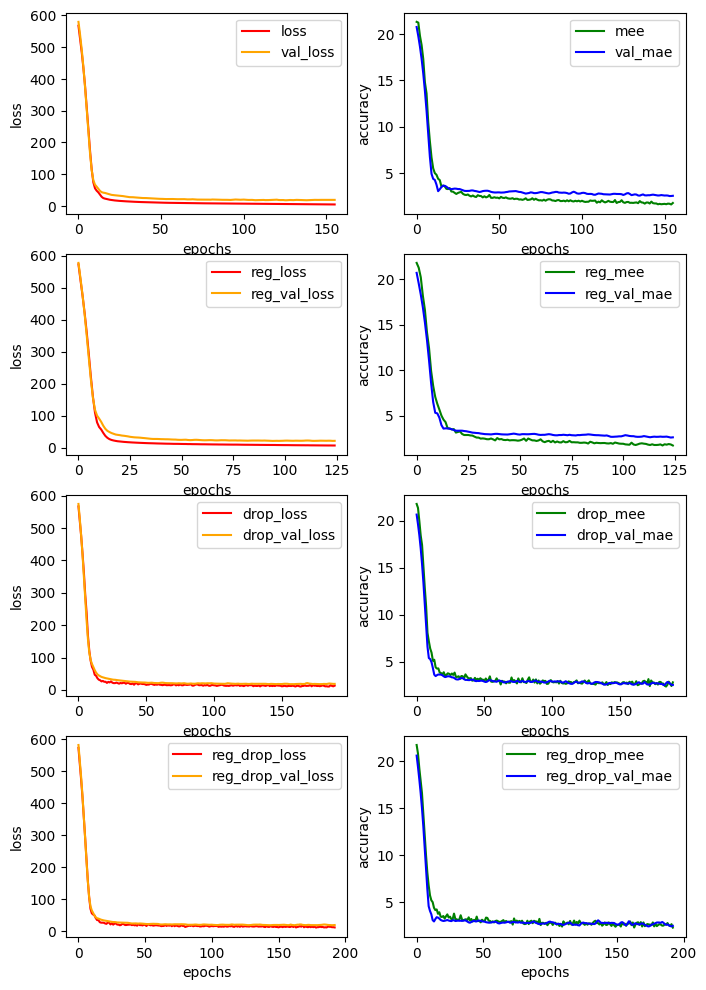

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(8, 12))

ax[0][0].plot(history.epoch, history.history["loss"], label="loss", color="red")
ax[0][0].plot(history.epoch, history.history["val_loss"], label="val_loss", color="orange")
ax[0][0].set_xlabel("epochs")
ax[0][0].set_ylabel("loss")
ax[0][0].legend()

ax[0][1].plot(history.epoch, history.history["mean_absolute_error"], label="mee", color="green")
ax[0][1].plot(history.epoch, history.history["val_mean_absolute_error"], label="val_mae", color="blue")
ax[0][1].set_xlabel("epochs")
ax[0][1].set_ylabel("accuracy")
ax[0][1].legend()

ax[1][0].plot(history_reg.epoch, history_reg.history["loss"], label="reg_loss", color="red")
ax[1][0].plot(history_reg.epoch, history_reg.history["val_loss"], label="reg_val_loss", color="orange")
ax[1][0].set_xlabel("epochs")
ax[1][0].set_ylabel("loss")
ax[1][0].legend()

ax[1][1].plot(history_reg.epoch, history_reg.history["mean_absolute_error"], label="reg_mee", color="green")
ax[1][1].plot(history_reg.epoch, history_reg.history["val_mean_absolute_error"], label="reg_val_mae", color="blue")
ax[1][1].set_xlabel("epochs")
ax[1][1].set_ylabel("accuracy")
ax[1][1].legend()

ax[2][0].plot(history_drop.epoch, history_drop.history["loss"], label="drop_loss", color="red")
ax[2][0].plot(history_drop.epoch, history_drop.history["val_loss"], label="drop_val_loss", color="orange")
ax[2][0].set_xlabel("epochs")
ax[2][0].set_ylabel("loss")
ax[2][0].legend()

ax[2][1].plot(history_drop.epoch, history_drop.history["mean_absolute_error"], label="drop_mee", color="green")
ax[2][1].plot(history_drop.epoch, history_drop.history["val_mean_absolute_error"], label="drop_val_mae", color="blue")
ax[2][1].set_xlabel("epochs")
ax[2][1].set_ylabel("accuracy")
ax[2][1].legend()

ax[3][0].plot(history_reg_drop.epoch, history_reg_drop.history["loss"], label="reg_drop_loss", color="red")
ax[3][0].plot(history_reg_drop.epoch, history_reg_drop.history["val_loss"], label="reg_drop_val_loss", color="orange")
ax[3][0].set_xlabel("epochs")
ax[3][0].set_ylabel("loss")
ax[3][0].legend()

ax[3][1].plot(history_reg_drop.epoch, history_reg_drop.history["mean_absolute_error"], label="reg_drop_mee", color="green")
ax[3][1].plot(history_reg_drop.epoch, history_reg_drop.history["val_mean_absolute_error"], label="reg_drop_val_mae", color="blue")
ax[3][1].set_xlabel("epochs")
ax[3][1].set_ylabel("accuracy")
ax[3][1].legend()

plt.show()

#Ocenjivanje mreže

In [ ]:
model.metrics_names

['loss', 'mean_absolute_error']

In [ ]:
scores = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
scores_reg = model_reg.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
scores_drop = model_drop.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
scores_reg_drop = model_reg_drop.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
scores, scores_reg, scores_drop, scores_reg_drop

3/3 [==============================] - 0s 5ms/step - loss: 16.3664 - mean_absolute_error: 2.5291


([15.842985153198242, 2.57452654838562],
 [17.831544876098633, 2.6248228549957275],
 [15.016212463378906, 2.5457088947296143],
 [16.36638832092285, 2.529083013534546])

In [ ]:
y_predict = model.predict(X_test)
y_predict_reg = model_reg.predict(X_test)
y_predict_drop = model_drop.predict(X_test)
y_predict_reg_drop = model_reg_drop.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
r2 = r2_score(y_test, y_predict)
r2_reg = r2_score(y_test, y_predict_reg)
r2_drop = r2_score(y_test, y_predict_drop)
r2_reg_drop = r2_score(y_test, y_predict_reg_drop)
r2, r2_reg, r2_drop, r2_reg_drop

(0.7907391290536561, 0.7867928534587831, 0.8016594990399822, 0.804529986273344)

In [ ]:
X_train.shape

(339, 13)

In [ ]:
X_new = np.random.randn(input_size)
X_new = X_new.reshape(1, 13)
X_new = scaler.transform(X_new)

In [ ]:
y_new = model.predict(X_new)
y_new_reg = model_reg.predict(X_new)
y_new_drop = model_drop.predict(X_new)
y_new_reg_drop = model_reg_drop.predict(X_new)
y_new, y_new_reg, y_new_drop, y_new_reg_drop

1/1 [==============================] - 0s 25ms/step


(array([[50.139698]], dtype=float32),
 array([[48.00457]], dtype=float32),
 array([[53.69156]], dtype=float32),
 array([[50.88674]], dtype=float32))